In [ ]:
import pandas as pd

df = pd.read_csv("edlich-kmeans-A0.csv")
df.head(10)

# A) What is the best k?

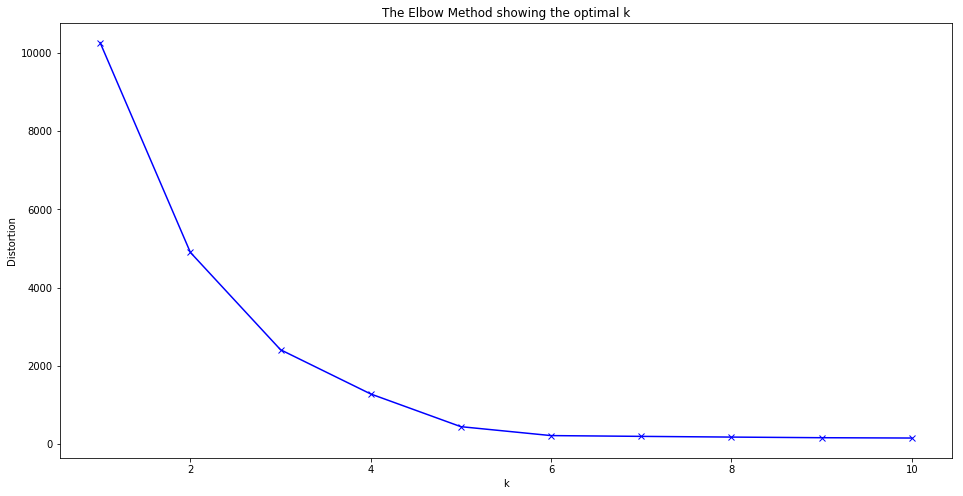

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [7]:
distortions

[10260.706784799486,
 4899.629957493973,
 2409.5098787388397,
 1278.1820569817,
 441.62328912304423,
 213.75035273896327,
 193.70273710209202,
 175.50789231942383,
 159.4444839821213,
 151.231582274606]

best k

In [8]:
bestk = 6

# B) Can you print the clustering vector?




print labels

In [9]:
#Import required module
from sklearn.cluster import KMeans

#Initialize the class object
kmeans = KMeans(n_clusters= bestk)

#predict the labels of clusters.
label = kmeans.fit_predict(df)

print(label)

[3 2 2 0 2 4 0 2 1 0 2 1 0 4 3 2 1 4 3 3 2 1 3 2 2 5 1 1 1 4 1 1 4 4 2 3 4
 3 1 2 4 4 4 3 4 2 0 0 4 0 0 4 1 1 0 0 3 0 2 4 0 3 5 0 4 0 3 3 3 4 4 0 1 0
 0 1 2 4 0 1 1 4 2 3 3 2 3 3 3 0 1 1 1 2 5 0 1 4 3 3]


In [12]:
cluster_centers = pd.DataFrame( kmeans.cluster_centers_, columns=["x", "y", "z"] )

print("Cluster center-coordinates:")
print(cluster_centers)

Cluster center-coordinates:
           x         y         z
0   5.882405  3.590739  4.605080
1  -2.403317  2.147529 -8.023789
2  -8.532420 -3.554015  8.968577
3  -5.106915  5.601798  3.719569
4   3.665368  8.910750 -9.065798
5  10.399197 -3.204062  9.163650


<Figure size 432x288 with 0 Axes>

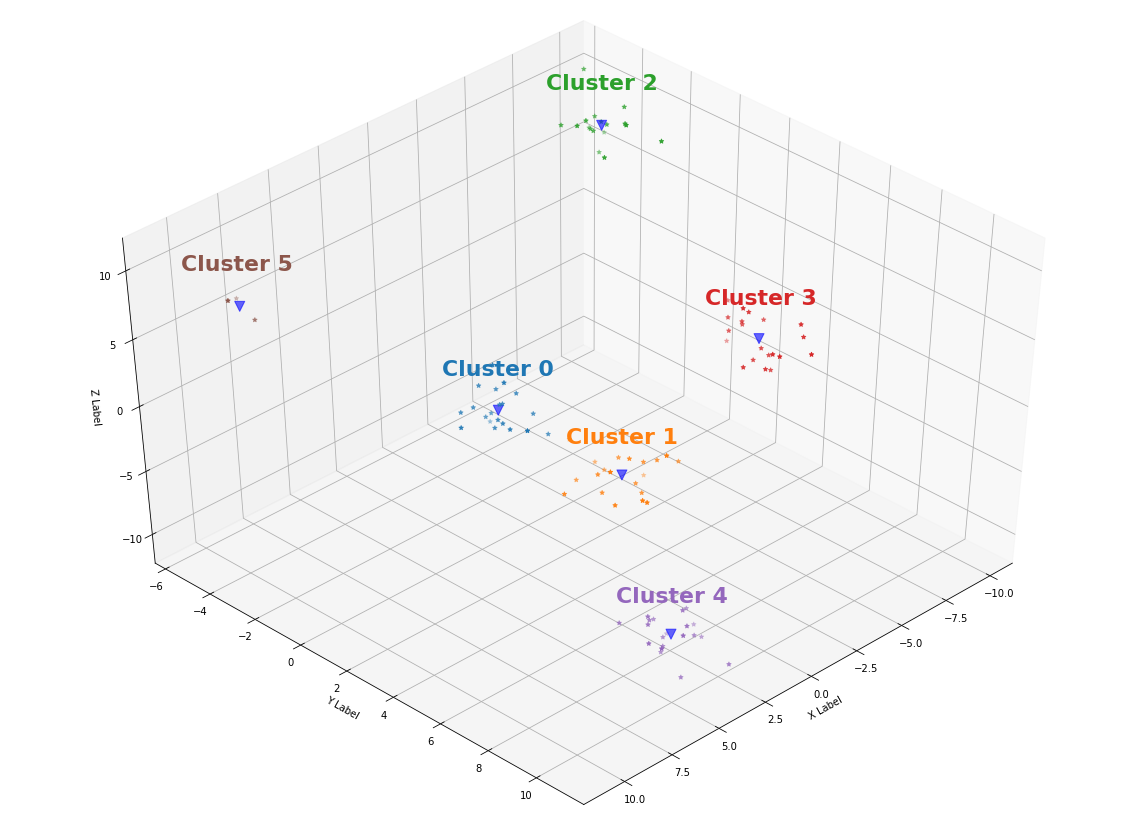

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

df["cluster"] = kmeans.labels_
rangecluster = range(0,bestk)

#define colormap
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig = plt.figure()
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

#plot cluster center points
ax.scatter(cluster_centers.iloc[:,0], cluster_centers.iloc[:,1], cluster_centers.iloc[:,2], c='b', marker='v', alpha=0.6, s=100)

#plot clusters
for cluster in rangecluster:
    # select cluster
    cdf = df.loc[df["cluster"] == cluster]
    
    # plot cluster
    ax.scatter(cdf.iloc[:,0], cdf.iloc[:,1], cdf.iloc[:,2], c=colors[cluster], marker='*')
    
    # cluster label
    ax.text(bkdf.iloc[cluster,0], bkdf.iloc[cluster,1], bkdf.iloc[cluster,2]+3, "Cluster {}".format(cluster), None, va='center', ha='center', color=colors[cluster], weight='bold', size='22')

    

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(45, 45) 

plt.show()